In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

/tmp/ipykernel_2199923/912229180.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import re

In [3]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [4]:
def parse_values(x):
    try:
        return ['_'.join(x.split()[0].split('_')[:-1]), int(x.split()[0].split('_')[-1]), *tuple(float(a) for a in x.split()[-5:])]
    except:
        return None

In [5]:
def semisupervised_plot(file_name, figure_file):

    with open(file_name, "r") as f:
        results = f.read()

    results = results.split('\n')
    results = [re.sub('[\[\]]', '', x) for x in results]
    results = [re.sub('lgbm ', '', x) for x in results]
    results = [re.sub('nn ', '', x) for x in results]

    metric_name = results[8].split()[-1].replace('"','')
    metric_name = {
        'auroc' : 'AUROC',
        'accuracy': 'Accuracy'
    }[metric_name]

    results = results[[i for i, x in enumerate(results) if 'scores_test' in x][0]:]
    results = [parse_values(x) for x in results]

    results = results[next(i for i, item in enumerate(results) if item is not None):]
    results = results[:next(i for i, item in enumerate(results) if item is None)]
    results = pd.DataFrame(results, columns = ['Name', 'Amount', 'test_V1', 'test_V2', 'test_V3', 'test_V4', 'test_V5'])

    results_melted = results[[(x in set(['baseline','mles_finetuning', 'cpc_finetuning', 'target_scores'])) for x in results['Name']]] \
        .melt(id_vars=['Name','Amount'], value_vars=['test_V1', 'test_V2', 'test_V3', 'test_V4', 'test_V5'])

    results_melted.rename(columns={'value':metric_name, 'Name':'Setup'}, inplace=True)

    results_melted['Setup'] = results_melted['Setup'].map({
        'baseline': 'lightGBM on hand-crafted features',
        'mles_finetuning': 'CoLES Fine-tuning',
        'cpc_finetuning': 'CPC Fine-tuning',
        'target_scores': 'Supervised learning '
    })

    with mpl.rc_context() as rc:
        mpl.rc("figure", figsize=(10,10))
        mpl.rc('font', size=20)
        ax = sns.lineplot(
            x="Amount",
            y=metric_name,
            data=results_melted,
            hue='Setup',
            style='Setup',
            legend='full',
        )

        ax.set_xlabel('Number of Labeled Datapoints')
        ax.set_xscale('log')

        vmin, vmax = results_melted[metric_name].values.min(), results_melted[metric_name].values.max()
        ax.set(ylim=(vmin, vmax))
        ax.set_facecolor('white')

        x_ticks = results_melted['Amount'].unique()
        plt.xticks(x_ticks,(str(x) for x in x_ticks))
        #plt.grid(color='white')

        mpl.pyplot.savefig(figure_file, format='pdf', bbox_inches='tight')

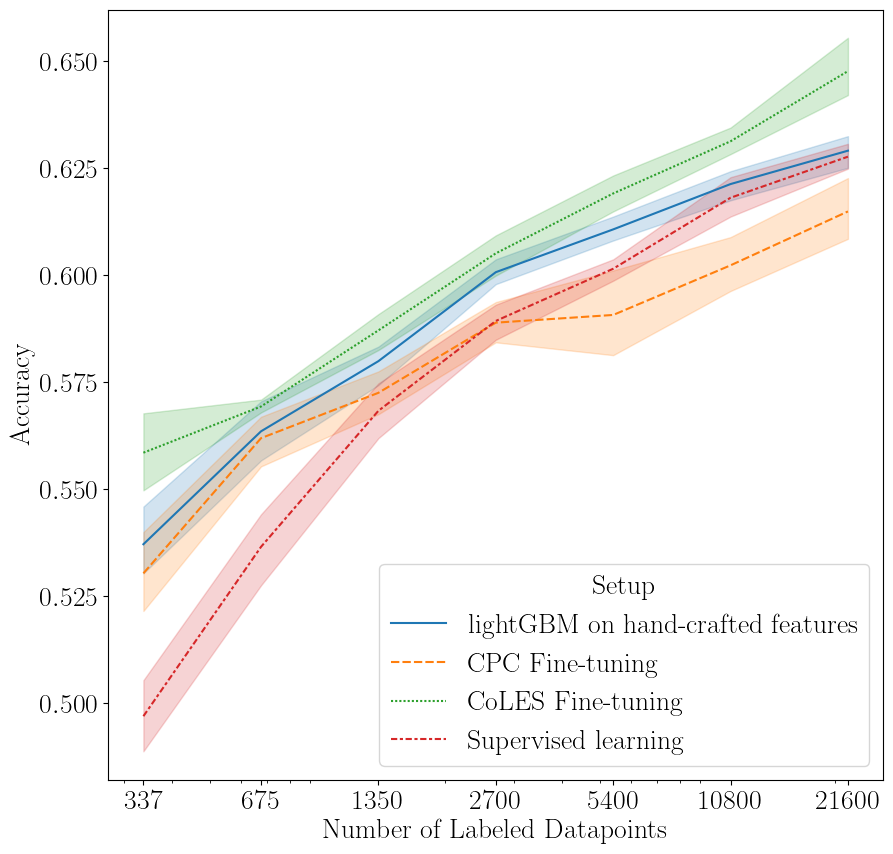

In [10]:
dataset = 'age_pred'

file_name = f"figures/scenario_{dataset}__semi_supervised.txt"
figure_file = f"figures/ss_{dataset}.pdf"

semisupervised_plot(file_name, figure_file)

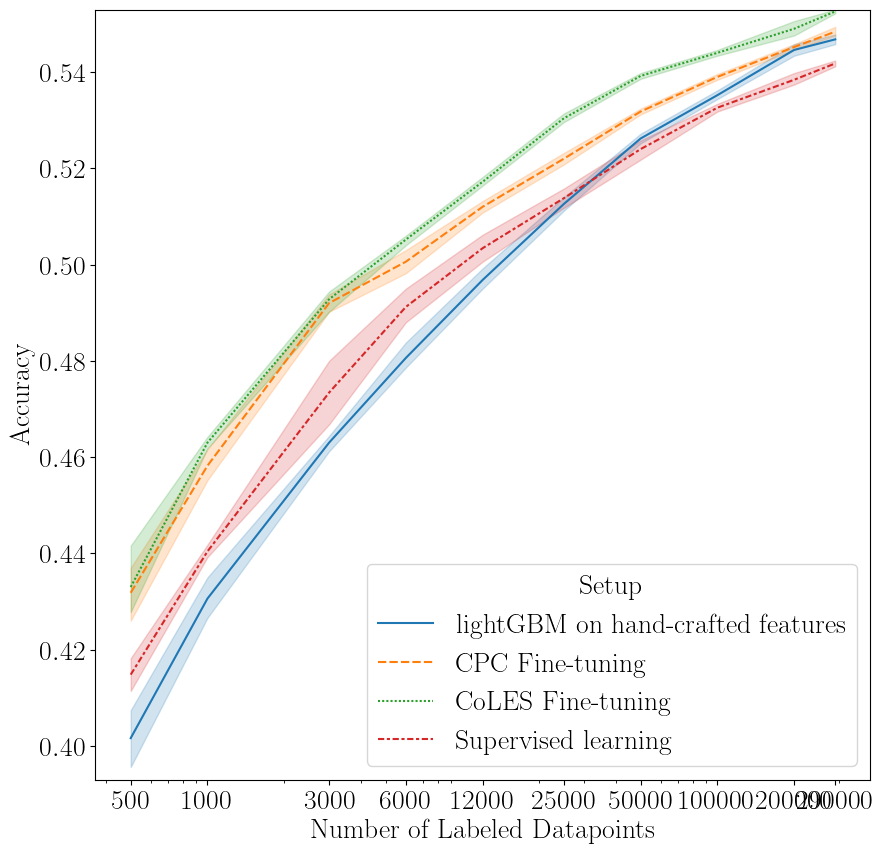

In [7]:
dataset = 'x5'

file_name = f"figures/scenario_{dataset}_semi_supervised.txt"
figure_file = f"figures/ss_{dataset}.pdf"

semisupervised_plot(file_name, figure_file)

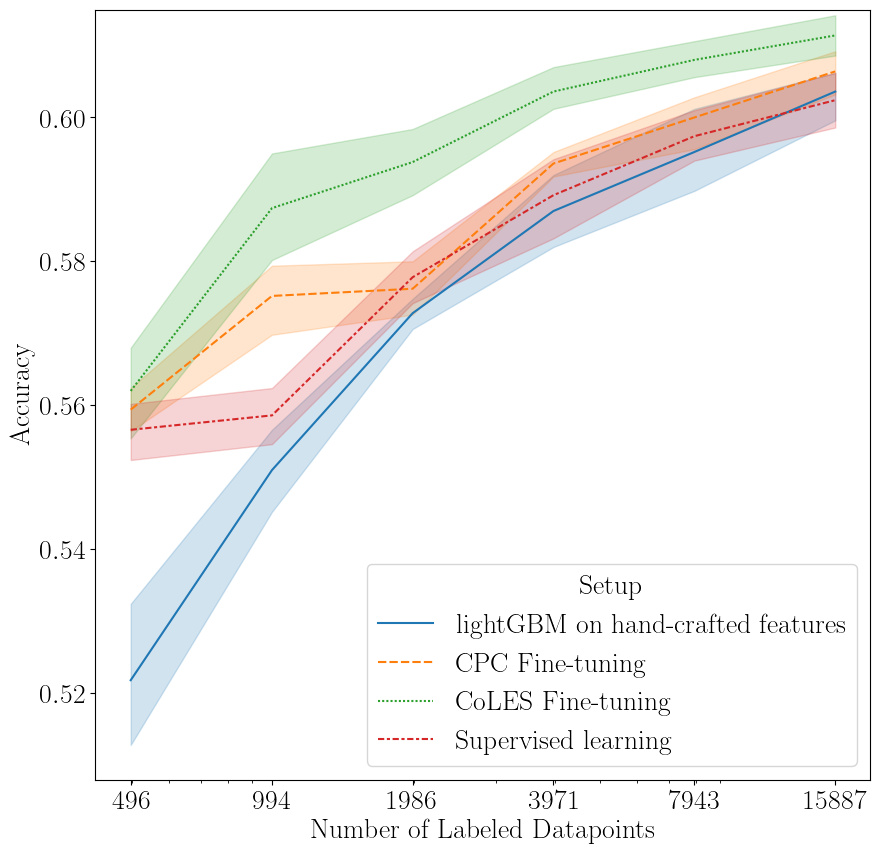

In [8]:
dataset = 'bowl2019'

file_name = f"figures/scenario_{dataset}__semi_supervised.txt"
figure_file = f"figures/ss_{dataset}.pdf"

semisupervised_plot(file_name, figure_file)

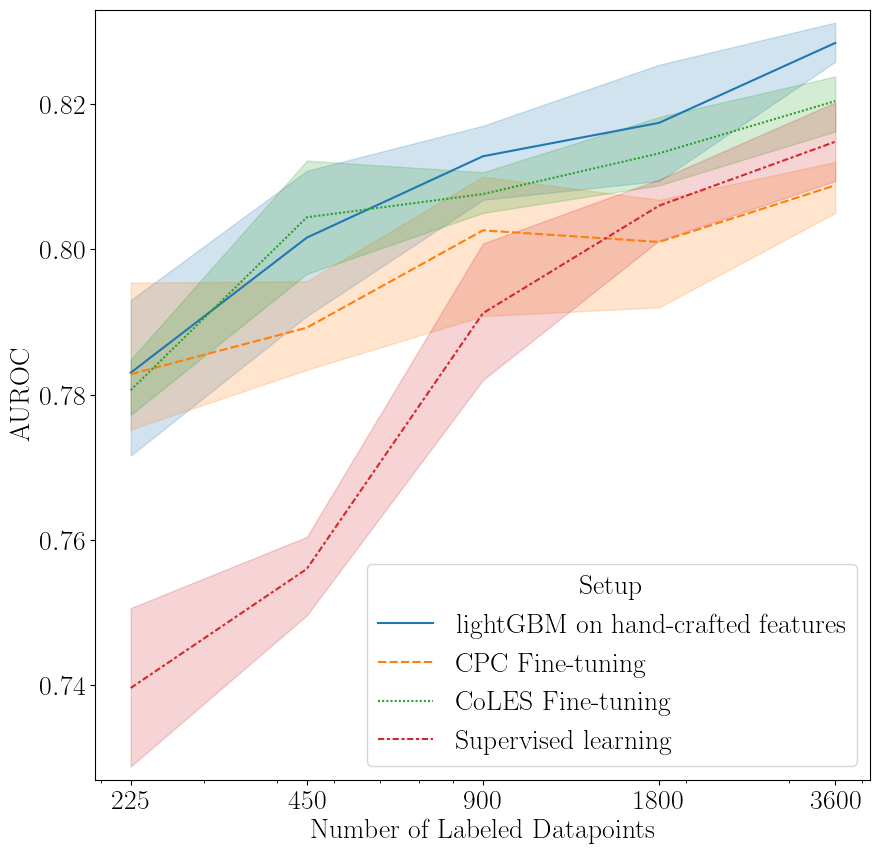

In [9]:
dataset = 'rosbank'

file_name = f"figures/scenario_{dataset}__semi_supervised.txt"
figure_file = f"figures/ss_{dataset}.pdf"

semisupervised_plot(file_name, figure_file)